In [1]:
from importlib import reload
import Fibre_Calculation_Functions as ff
DEF_WVL = [1545,1560]

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
reload(ff)
# fdir = r"C:\Users\rohan\OneDrive - Victoria University of Wellington - STAFF\Documents\Micron Optics\ENLIGHT\Data\2025\05"

# ff.convert_responsesfolder_to_csv(fdir, wvl_range=DEF_WVL, override_responses = True)

<module 'Fibre_Calculation_Functions' from 'c:\\Users\\rohan\\OneDrive - Victoria University of Wellington - STAFF\\Documents\\Published Fibre Work\\Fibre_Calculation_Functions.py'>

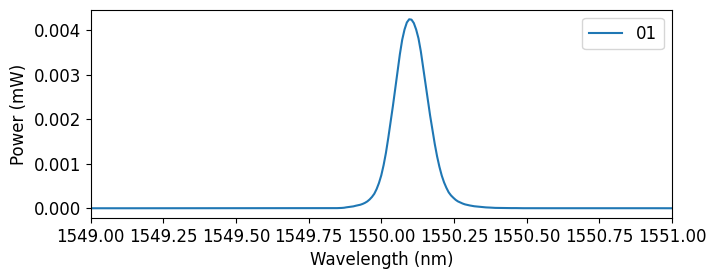

In [3]:
fname = r"Fibre Data Files\Stationary Spectra\FBGs 17.04\01.txt"
spec=ff.spectral.load_from_enlight(fname, wvl_range=DEF_WVL).plot_mw(True)

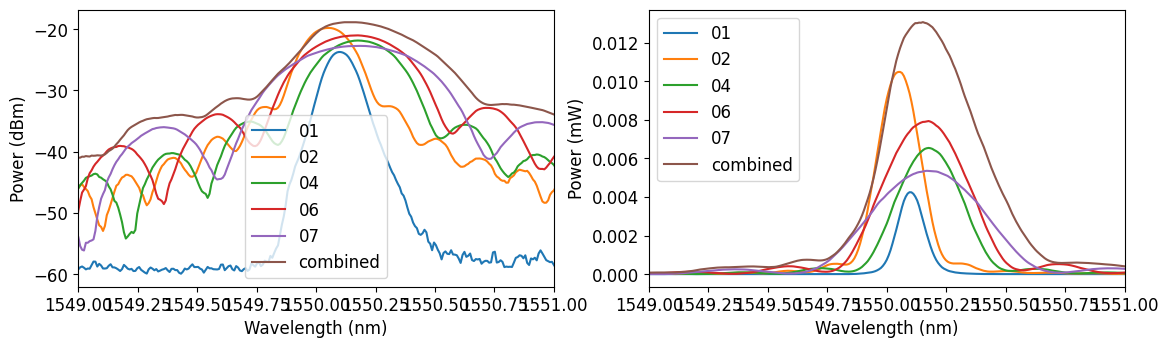

In [4]:
fdir1 = r"Fibre Data Files\Stationary Spectra\FBGs 17.04"
ff.spectral_summation.load_from_enlight_folder(fdir1, wvl_range=DEF_WVL).plot_powers(True)

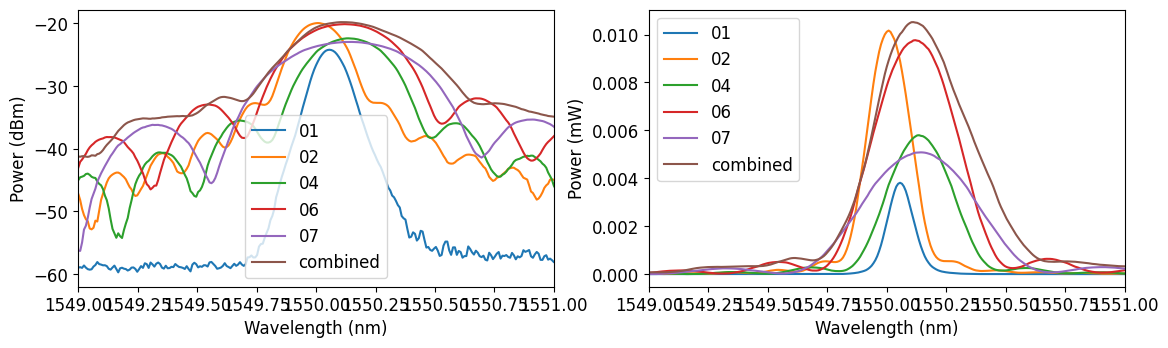

In [ ]:
fdir2 = r"Fibre Data Files\Stationary Spectra\FBGs 24.04"
# test
ff.spectral_summation.load_from_enlight_folder(fdir2, wvl_range=DEF_WVL).plot_powers(True)

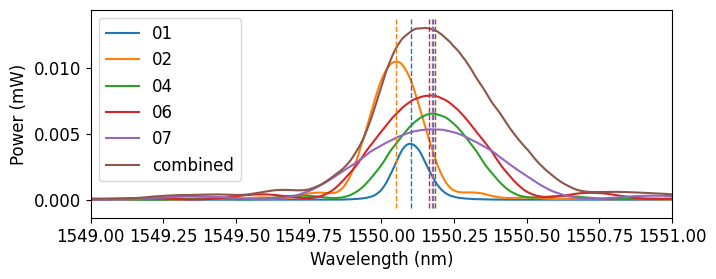

In [6]:
arr = ff.spectral_summation.load_from_enlight_folder(fdir1, wvl_range=DEF_WVL).fit_gaussian()
arr.plot_mw(True)

fig,axs = plt.gcf(), plt.gca()
x0s = [run.x0 for run in arr]
ids = [run.id for run in arr] 
xmin,xmax, ymin, ymax = axs.axis()
plt.vlines(x0s, ymin = ymin, ymax = ymax, label = ids, colors = ff.get_colourlist(len(arr)), linestyle = 'dashed', linewidth = 1)

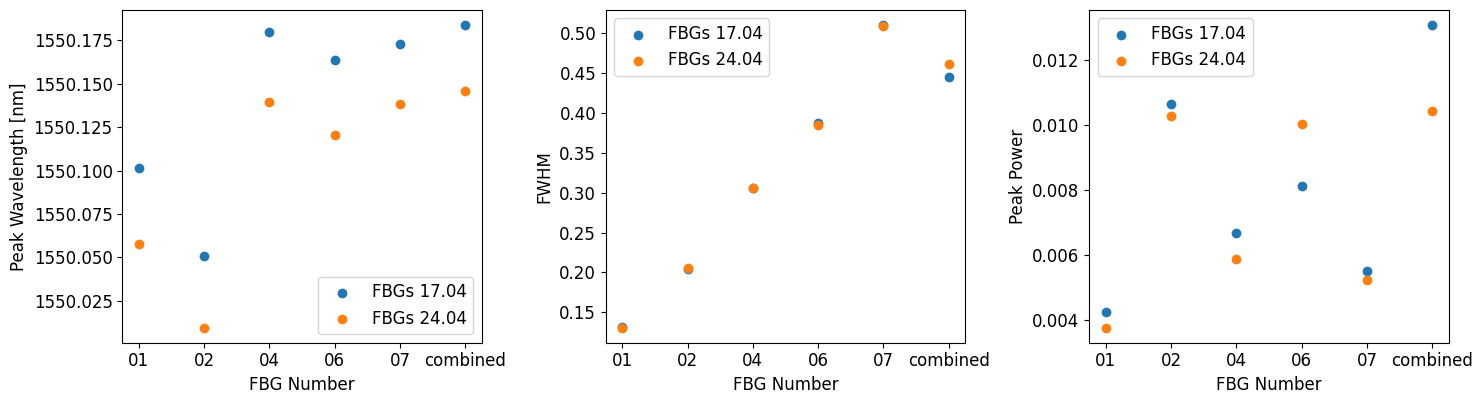

In [7]:
fig, axs = plt.subplots(1, 3, figsize =.6*np.array([25,7]))

axs[0].set(xlabel = "FBG Number", ylabel = "Peak Wavelength [nm]")
axs[0].ticklabel_format(useOffset = False)
axs[1].set(xlabel = "FBG Number", ylabel = "FWHM")
axs[2].set(xlabel = "FBG Number", ylabel = "Peak Power")

arr1 = ff.spectral_summation.load_from_enlight_folder(fdir1, wvl_range=DEF_WVL).fit_gaussian()
arr2 = ff.spectral_summation.load_from_enlight_folder(fdir2, wvl_range=DEF_WVL).fit_gaussian()

for arr in [arr1,arr2]:
    ids = [run.id for run in arr]
    x0s = [run.x0 for run in arr]
    fwhms = [run.fwhm for run in arr]
    a_s = [run.a for run in arr]
    axs[0].scatter(ids, x0s, label = arr.array_name)
    axs[1].scatter(ids, fwhms, label = arr.array_name)
    axs[2].scatter(ids, a_s, label = arr.array_name)

[ax.legend() for ax in axs]

plt.tight_layout()

(1549.5, 1550.5)

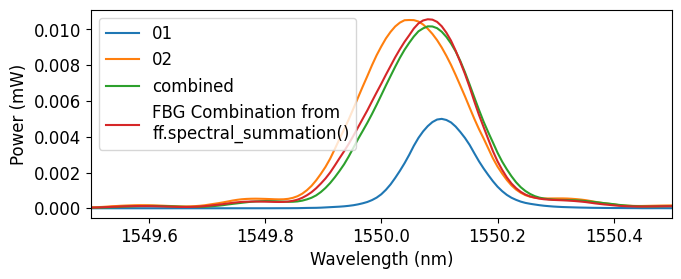

In [8]:
fold_dir = r"Fibre Data Files\Stationary Spectra\FBGs comb attempt"
arr = ff.spectral_summation.load_from_enlight_folder(fold_dir, wvl_range=DEF_WVL).fit_gaussian()
arr.plot_mw(True)
fig, axs = plt.gcf(), plt.gca()
run_arr = ff.spectral_summation.load_from_files(fold_dir, ['01.txt', '02.txt']).fit_gaussian()

comb = run_arr()(run_arr.wvl(), .2, *[0.4,.4], *[0.,0.])
axs.plot(run_arr.wvl(), comb, label = "FBG Combination from\nff.spectral_summation()")
 
axs.legend()
axs.set_xlim(1549.5,1550.5)

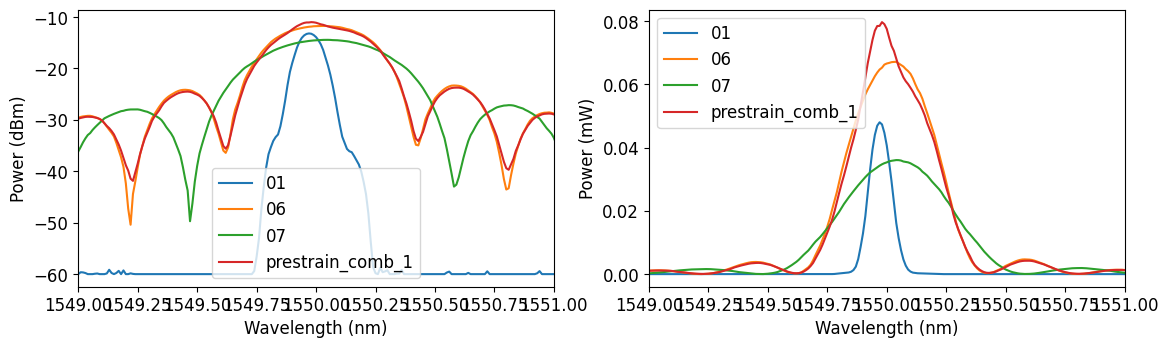

In [10]:
rootdir = r"Fibre Data Files\FBGs 10.06\Stationary"
fnames = ['01.txt', '06.txt', '07.txt']

total_si155 = ff.spectral_summation.load_from_files(rootdir, fnames, wvl_range = DEF_WVL)
total_si155.plot_powers()
total_si155.fit_gaussian()
# for run in total_si155:
#     print(run.p0)

combined = ff.spectral_summation.load_from_files(rootdir, ['prestrain_comb_1.txt'], wvl_range = DEF_WVL)
combined.plot_powers(False)

[ 3.17426101e-01  5.03447262e-01  7.03185531e-11  3.00000000e+00
 -2.86832406e-03  4.54934480e-03 -1.03178877e-02]


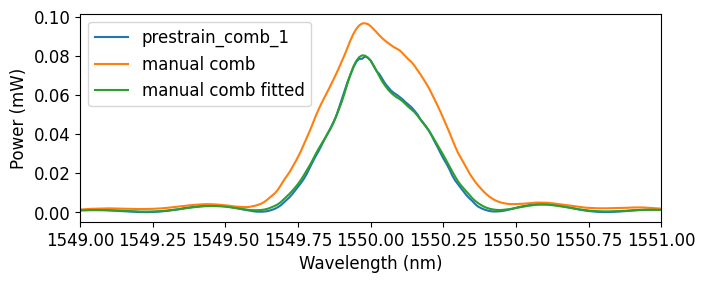

In [11]:
reload(ff)
combined.plot_mw(True)
fig,ax = plt.gcf(), plt.gca()

comb_func = total_si155()

ax.plot(total_si155.wvl(),
         comb_func(total_si155.wvl(), .2, *[0.,0.,0.], *[0.,0.,0.]), label = 'manual comb')

bounds = ([0,0,0,0,-5,-5,-5], [10,3,3,3,10, 10, 10])
popt, pcov = curve_fit(comb_func, total_si155.wvl(),combined.power(), p0 = [.2, 0., 0.,0.,0.,0.,0.], bounds = bounds)
print(popt)

ax.plot(total_si155.wvl(), comb_func(total_si155.wvl(), *popt), label = 'manual comb fitted')

_ = ax.legend()
# # ax.set_xlim(1549.5, 1550.5)